**Importing the necessary Libraries**

In [ ]:
#import necessary libraries for the project
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
hospital_df = pd.read_csv('/content/Health_facilities_csv.csv')

####Display first five rows in the dataset






In [ ]:
hospital_df.head(5)

osm_id building addr_full          name_ne healthcare_speciality  \
0  1382985019      NaN     Ganda              NaN                   NaN   
1  4711638797      NaN       NaN              NaN                   NaN   
2  4261924702      NaN       NaN              NaN                   NaN   
3  4776716308      NaN       NaN  गौउँ घर क्लिनिक                   NaN   
4  8279034304      NaN       NaN              NaN                   NaN   

        source addr_city healthcare  capacity_persons operator_type  \
0          NaN   Pokhara        NaN               NaN           NaN   
1          NaN   Pokhara    dentist               NaN           NaN   
2  Yoyo Preset   Pokhara   hospital               NaN    government   
3          NaN   Pokhara        NaN               NaN           NaN   
4      yil2020   Pokhara        NaN               NaN           NaN   

                                         name   amenity  longitude   latitude  \
0  Gorepani Comunal Healt Social Reform Group  hospital  83.699375  28.399927   
1                          Medical Dental Lab   dentist  83.693409  28.423711   
2                                 Health post  hospital  83.809900  28.375507   
3                             Gau Ghar Clinic    clinic  83.953617  28.279375   
4                               Charka Clinic    clinic  83.409765  29.090590   

  geom_type  
0     POINT  
1     POINT  
2     POINT  
3     POINT  
4     POINT

####Check for the number of null values in the health facilities dataset

In [ ]:
hospital_df.isnull().sum()

osm_id                      0
building                 5717
addr_full                5705
name_ne                  5144
healthcare_speciality    5646
source                   5306
addr_city                5215
healthcare               4615
capacity_persons         5734
operator_type            5611
name                      816
amenity                   372
longitude                   0
latitude                    0
geom_type                   0
dtype: int64

### Display the column names in the dataset

In [ ]:
hospital_df.columns

Index(['osm_id', 'building', 'addr_full', 'name_ne', 'healthcare_speciality',
       'source', 'addr_city', 'healthcare', 'capacity_persons',
       'operator_type', 'name', 'amenity', 'longitude', 'latitude',
       'geom_type'],
      dtype='object')

### Drop the unnecessary colums in the database

In [ ]:
columns_to_drop = ['building', 'addr_full', 'name_ne', 'source', 'addr_city', 'capacity_persons', 'operator_type', 'amenity', 'geom_type']

hospital_df.drop(columns=columns_to_drop, inplace=True)

#### Display first row with the remaining columns

In [ ]:
hospital_df.head(1)

osm_id healthcare_speciality healthcare  \
0  1382985019                   NaN        NaN   

                                         name  longitude   latitude  
0  Gorepani Comunal Healt Social Reform Group  83.699375  28.399927

#### Check for the counts of the healthcare facilities


In [ ]:
hospital_df['healthcare'].value_counts()

healthcare
pharmacy                  236
clinic                    205
hospital                  204
yes                       172
dentist                    68
laboratory                 53
centre                     38
alternative                32
doctor                     30
health_post                13
physiotherapist            11
birthing_centre             8
optometrist                 8
vaccination_centre          7
hospice                     6
rehabilitation              4
health_center               3
health post                 3
midwife                     2
counselling                 2
blood_donation              2
yel                         1
health_centre               1
Health_Post                 1
dental                      1
nurse                       1
general                     1
health_clinic               1
health_care_center          1
blood_bank                  1
doctor,_pharmacy            1
occupational_therapist      1
doctor/birthing_centre      1

#### Cleaning and Standardization

In [ ]:
hospital_df['healthcare'] = hospital_df['healthcare'].replace(['health_post', 'health post', 'health_center', 'health_centre', 'centre', 'health_care_center', 'Health_Post', 'nurse', 'yel', 'midwife', 'doctor/birthing_centre','birthing_centre', 'counselling'], 'Primary Health care centre')
hospital_df[hospital_df['healthcare'] == 'Dental Clinics']
hospital_df['healthcare'] = hospital_df['healthcare'].replace(['dental', 'dentist'], 'dental clinics')
hospital_df['healthcare'] = hospital_df['healthcare'].replace(['yes'], 'health-post')
hospital_df['healthcare'] = hospital_df['healthcare'].replace(['doctor,_pharmacy','blood_bank', 'health_clinic', 'vaccination_centre'],'health-post')
hospital_df['healthcare'] = hospital_df['healthcare'].replace(['general', 'hospice', 'doctor'], 'hospital')
hospital_df['healthcare'] = hospital_df['healthcare'].replace(['alternative'], 'Others')
hospital_df['healthcare'] = hospital_df['healthcare'].replace(['Primary Health care centre'], 'primary health care centre(PHCC)')


#### Display the Updated List of Healthcare Facility types

In [ ]:
hospital_df['healthcare'].value_counts()

healthcare
hospital                            241
pharmacy                            236
clinic                              205
health-post                         182
primary health care centre(PHCC)     75
dental clinics                       69
laboratory                           53
Others                               32
physiotherapist                      11
optometrist                           8
rehabilitation                        4
blood_donation                        2
occupational_therapist                1
Name: count, dtype: int64

**Visualizing the Distribution of Health Facilities**

In [ ]:
sorted_counts = hospital_df['healthcare'].value_counts()

# Get the order of the bars
order = sorted_counts.index

# Set the colors for the bars
colors = ['red' if x == order[0] else 'green' for x in order]

#### Count plot to display the Distribution of Health Facilities, by type, in Nepal

<ipython-input-52-6d6e7755a6ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hospital_df, x='healthcare', order=order, palette=colors)


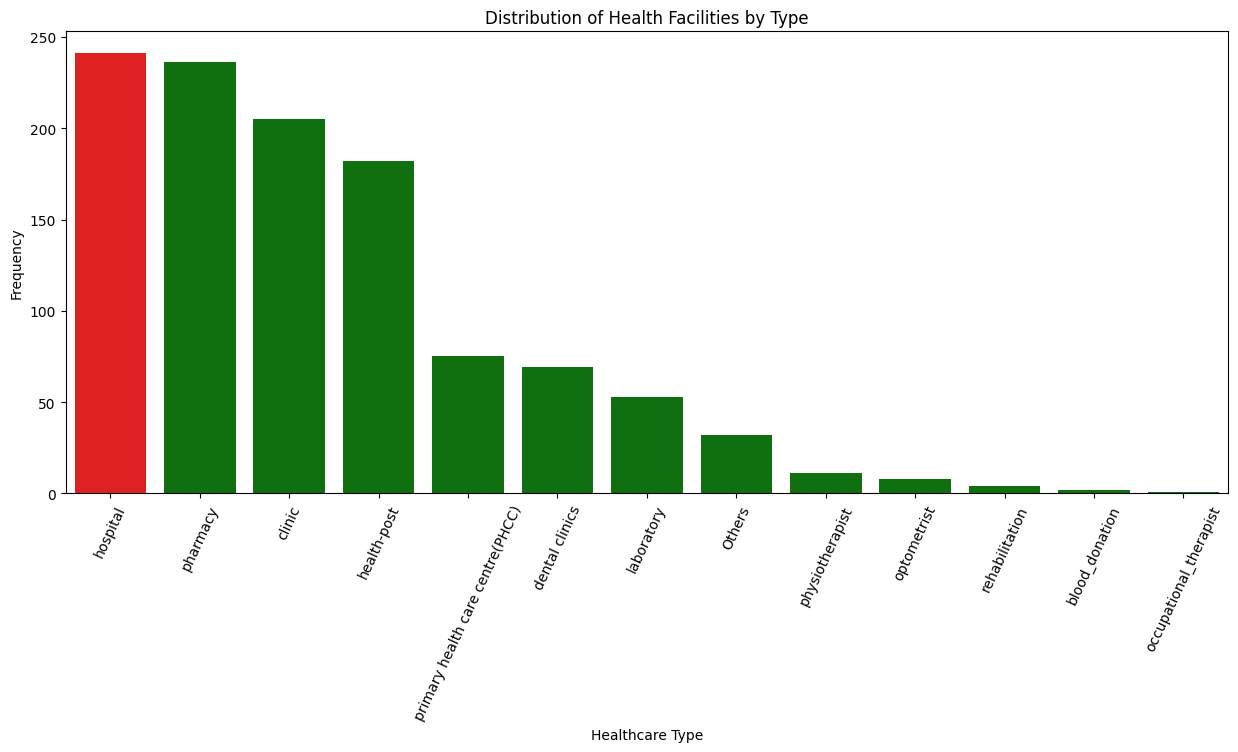

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=hospital_df, x='healthcare', order=order, palette=colors)
plt.title('Distribution of Health Facilities by Type')
plt.xlabel('Healthcare Type')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

#### Scatter plot to visualize the geographical distribution of health facilities

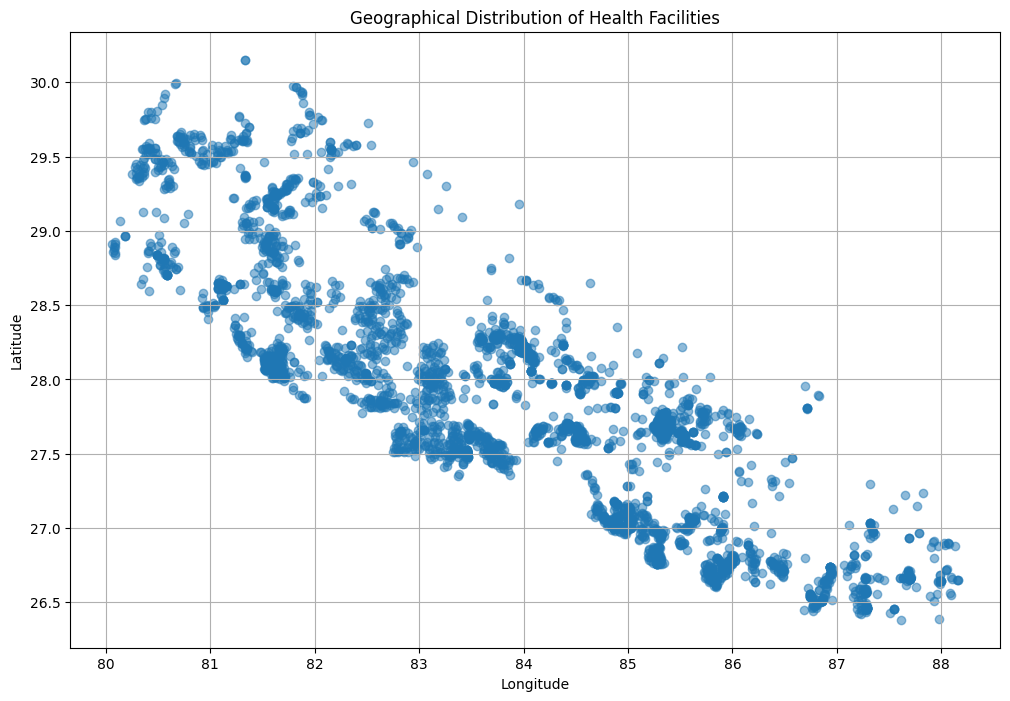

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(hospital_df['longitude'], hospital_df['latitude'], marker='o', alpha=0.5)
plt.title('Geographical Distribution of Health Facilities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**LOCATION MAPPING FOR THE TWO PROVINCES OF CHOICE: KARNALI AND BAGMATI**

**KARNALI**

#### Defining the longitude and latitude range of Karnali

In [ ]:
min_longitude = 81.59078  # 80058’58” East longitude
max_longitude = 83.042500  # 83040’57” East longitude
min_latitude = 28.178611    # 28010’7″ North latitude
max_latitude = 30.187222    # 30026’50” North latitude

#### Filter the dataset based on the defined range

In [ ]:
karnali_province_df = hospital_df[(hospital_df['longitude'] >= min_longitude) & (hospital_df['longitude'] <= max_longitude) &
                                  (hospital_df['latitude'] >= min_latitude) & (hospital_df['latitude'] <= max_latitude)]

#### Display the health facilities in the filtered Karnali province region

In [ ]:
karnali_province_df.head(5)

osm_id healthcare_speciality healthcare  \
1867  9794521209                   NaN        NaN   
1869  9687953569                   NaN        NaN   
1870  9263241324                   NaN     clinic   
1872  5064405624                   NaN        NaN   
2019  9796788948                   NaN        NaN   

                              name  longitude   latitude  
1867  प्रार्थमिक स्वास्थ्य केन्द्र  81.629684  28.206251  
1869            Health Post Malika  81.627248  28.789078  
1870              Nihit Polyclinic  81.628824  28.593770  
1872                           NaN  81.624397  28.927171  
2019           स्वास्थ्य चाैकि उवा  82.803241  28.431826

#### Print a count of the number of hospitals in Karnali province

In [ ]:

print("Number of hospitals in Karnali province:", len(karnali_province_df))


Number of hospitals in Karnali province: 466


**BAGMATI**

#### Defining the longitude and latitude range of Bagmati

In [ ]:
min_longitude_bagmati = 83.939441  # West boundary
max_longitude_bagmati = 86.557544  # East boundary
min_latitude_bagmati = 26.982728   # South boundary
max_latitude_bagmati = 28.335271   # North boundary

#### Filter the dataset based on the defined range for Bagmati Province

In [ ]:
bagmati_province_df = hospital_df[(hospital_df['longitude'] >= min_longitude_bagmati) &
                                   (hospital_df['longitude'] <= max_longitude_bagmati) &
                                   (hospital_df['latitude'] >= min_latitude_bagmati) &
                                   (hospital_df['latitude'] <= max_latitude_bagmati)]

#### Display the health facilities in the filtered Bagmati province region

In [ ]:
bagmati_province_df.head(5)

osm_id                            healthcare_speciality  \
3    4776716308                                              NaN   
8   10920666705                                              NaN   
9    9517071818                                              NaN   
10   4798610256  orthodontics;dental_oral_maxillo_facial_surgery   
11   5544259293                                              NaN   

        healthcare                         name  longitude   latitude  
3              NaN              Gau Ghar Clinic  83.953617  28.279375  
8              NaN                          NaN  83.997822  28.217315  
9              NaN            Aarshika Pharmacy  83.976689  28.224543  
10  dental clinics  Smile Care and Dential Care  83.989638  28.226093  
11             NaN       Dyanamic Dental Clinic  83.985538  28.209831

#### Print a count of the number of health facilities in Bagmati province

In [ ]:
print("Number of hospitals in Bagmati province:", len(bagmati_province_df))

Number of hospitals in Bagmati province: 2815


**Display map of Karnali and the points of the hospitals in the map**

In [ ]:
import folium

#### Define coordinates and filter the hospitals in Karnali. Use folium to create a map marking the location of the hospitals.

In [ ]:
# Define the coordinates for Karnali Province's boundaries
karnali_coordinates = [
    (30.045289, 81.285974), (29.654610, 81.692468), (29.367782, 81.626550), (28.916791, 81.329919),
    (28.964862, 81.011316), (28.839829, 81.187097), (28.627893, 81.351892), (28.367203, 81.725427),
    (28.260811, 82.087976), (28.173685, 82.373620), (28.598959, 82.582360), (28.762811, 83.351403),
    (28.936022, 83.516198), (29.137736, 83.648034), (29.606862, 83.197595), (30.007242, 82.417565),
    (30.187838, 82.186853)
]

# Filter hospitals falling inside Karnali Province's coordinates
hospitals_inside_karnali = hospital_df[
    (hospital_df['latitude'] >= 28.260811) & (hospital_df['latitude'] <= 30.187838) &
    (hospital_df['longitude'] >= 81.011316) & (hospital_df['longitude'] <= 83.648034)
]

# Create a Folium map centered around Karnali Province
map_karnali = folium.Map(location=[29.0, 82.0], zoom_start=8)

# Add markers for hospitals falling inside Karnali Province's coordinates
for _, hospital in hospitals_inside_karnali.iterrows():
    folium.Marker(
        location=[hospital['latitude'], hospital['longitude']],
        popup=hospital['name']
    ).add_to(map_karnali)

# Display the map
map_karnali


**Display map of Bagmati and the points of the hospitals in the map**

#### Define coordinates and filter the hospitals in Bagmati. Use folium to create a map marking the location of the hospitals.

In [ ]:
# Define the coordinates for Bagmati Province's boundaries
bagmati_coordinates = {
    'north': [(28.335271, 85.140308), (28.078707, 85.898364), (28.025381, 86.090625), (28.161068, 86.189502), (27.952621, 86.508105)],
    'east': [(27.806954, 86.557544), (27.583218, 86.398242), (27.393170, 86.222461), (27.183251, 86.365283), (26.982728, 86.348804)],
    'south': [(26.987623, 86.178516), (27.153929, 85.502856), (27.271173, 85.151294), (27.417554, 84.849170), (27.378538, 84.475635),
              (27.490671, 84.173511), (27.450316, 83.939441)],
    'west': [(27.955755, 84.740470), (27.650925, 84.223546), (28.107849, 84.836760), (28.335586, 85.044543)]
}

# Filter hospitals falling inside Bagmati Province's coordinates
hospitals_inside_bagmati = hospital_df[
    (hospital_df['latitude'] >= 26.982728) & (hospital_df['latitude'] <= 28.335271) &
    (hospital_df['longitude'] >= 83.939441) & (hospital_df['longitude'] <= 86.557544)
]

# Create a Folium map centered around Bagmati Province
map_bagmati = folium.Map(location=[27.6, 85.4], zoom_start=8)


# Add markers for hospitals falling inside Bagmati Province's coordinates
for _, hospital in hospitals_inside_bagmati.iterrows():
    folium.Marker(
        location=[hospital['latitude'], hospital['longitude']],
        popup=hospital['name']
    ).add_to(map_bagmati)

# Display the map
map_bagmati


**IMPORT AND LOAD THE NEPAL HEALTH CARE OUTCOMES DATASET**

Load the Nepal Health care outcomes dataset

In [ ]:
healthcare_outcomes_df = pd.read_excel('/content/Health Care outcomes.xlsx')

#### Display the first five rows of the health care outcomes dataset

In [ ]:
healthcare_outcomes_df.head()

Area   Estimated CDR Male  Estimated CDR Female  \
0             Nepal                 6.61                  4.80   
1  Ecological Belts                  NaN                   NaN   
2          Mountain                 8.30                  6.59   
3              Hill                 7.00                  4.83   
4             Terai                 6.09                  4.38   

   Registered CDR Male  Registered CDR Female  Population 2017 Male  \
0                 4.86                   3.14            13969014.0   
1                  NaN                    NaN                   NaN   
2                 6.05                   3.57              907769.0   
3                 5.65                   3.61             5814237.0   
4                 4.08                   2.69             7247009.0   

   Total population  Population 2017 Female  Estimated deaths Male  \
0        28810563.0              14841549.0                92309.0   
1               NaN                     NaN                    NaN   
2         1866811.0                959042.0                 7533.0   
3        12141712.0               6327475.0                40714.0   
4        29604080.0               7555031.0                44125.0   

   Estimated deaths  Estimated deaths Female  Under-five mortality  \
0           81778.0                  71247.0                  33.4   
1               NaN                      NaN                   NaN   
2            6926.0                   6320.0                  49.8   
3           35641.0                  30569.0                  30.1   
4           77181.0                  33056.0                  33.1   

   Under -five mortality Male  Under-five mortality Female  Adult mortality  \
0                        35.6                         31.1            137.0   
1                         NaN                          NaN              NaN   
2                        51.8                         47.7            160.0   
3                        32.8                         27.2            127.0   
4                        34.8                         31.3            127.0   

   Adult mortality Male  Adult mortality Female  Life expectancy Male  \
0                 159.0                   116.0                  69.7   
1                   NaN                     NaN                   NaN   
2                 181.0                   140.0                  67.3   
3                 154.0                   101.0                  70.3   
4                 148.0                   106.0                  70.3   

   Life expectancy Female  Life expectancy  
0                    73.9            71.80  
1                     NaN              NaN  
2                    70.9            69.10  
3                    75.6            72.95  
4                    74.6            72.45

### Filter out the NaN values in the dataset and display the dataset

In [ ]:
healthcare_outcomes_df.dropna(inplace=True)

healthcare_outcomes_df

Area   Estimated CDR Male  Estimated CDR Female  \
0            Nepal                 6.61                  4.80   
2         Mountain                 8.30                  6.59   
3             Hill                 7.00                  4.83   
4            Terai                 6.09                  4.38   
6       Province 1                 6.51                  4.29   
7          Madhesh                 5.21                  3.95   
8          Bagmati                 6.07                  4.56   
9          Gandaki                 8.08                  5.28   
10         Lumbini                 7.28                  4.96   
11         Karnali                 7.41                  4.74   
12   Sudurpashchim                 8.08                  6.38   

    Registered CDR Male  Registered CDR Female  Population 2017 Male  \
0                  4.86                   3.14            13969014.0   
2                  6.05                   3.57              907769.0   
3                  5.65                   3.61             5814237.0   
4                  4.08                   2.69             7247009.0   
6                  4.92                   3.03             2284395.0   
7                  3.03                   2.21             3000718.0   
8                  4.71                   3.41             3062868.0   
9                  7.63                   4.79             1130528.0   
10                 5.91                   3.78             2312468.0   
11                 3.17                   1.73              847971.0   
12                 6.10                   2.82             1330068.0   

    Total population  Population 2017 Female  Estimated deaths Male  \
0         28810563.0              14841549.0                92309.0   
2          1866811.0                959042.0                 7533.0   
3         12141712.0               6327475.0                40714.0   
4         29604080.0               7555031.0                44125.0   
6          9620118.0               2525664.0                14872.0   
7         11928224.0               2963394.0                15628.0   
8         12252304.0               3063284.0                18593.0   
9          4966544.0               1352744.0                 9137.0   
10         9793746.0               2584405.0                16833.0   
11         3455866.0                879962.0                 6283.0   
12         5604328.0               1472096.0                10742.0   

    Estimated deaths  Estimated deaths Female  Under-five mortality  \
0            81778.0                  71247.0                 33.40   
2             6926.0                   6320.0                 49.80   
3            35641.0                  30569.0                 30.10   
4            77181.0                  33056.0                 33.10   
6            25702.0                  10830.0                 26.05   
7            13670.0                  11713.0                 30.90   
8            16287.0                  13981.0                 25.40   
9             8139.0                   7142.0                 23.30   
10           14821.0                  12810.0                 36.60   
11            5228.0                   4173.0                 49.45   
12           10068.0                   9394.0                 49.90   

    Under -five mortality Male  Under-five mortality Female  Adult mortality  \
0                         35.6                         31.1            137.0   
2                         51.8                         47.7            160.0   
3                         32.8                         27.2            127.0   
4                         34.8                         31.3            127.0   
6                         29.4                         22.7            111.0   
7                         31.2                         30.6            113.0   
8                         27.6                         23.2            115.0   
9                     

**VISUALIZE THE HEALTH OUTCOMES DATASET**

#### Plot a barplot showing the Adult Mortality rate for Male and Females in all the defined Areas of the dataset

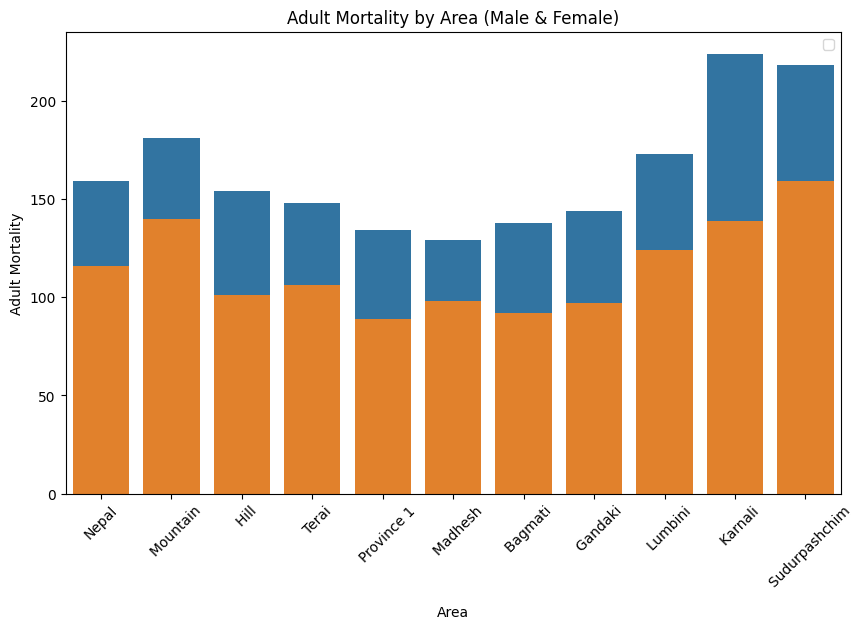

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='Adult mortality Male', data=healthcare_outcomes_df)
sns.barplot(x='Area', y='Adult mortality Female', data=healthcare_outcomes_df)  # Add second barplot
plt.title('Adult Mortality by Area (Male & Female)')
plt.xlabel('Area')
plt.ylabel('Adult Mortality')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Pairplot to visualize Estimated deaths, Adult mortality, Life expectancy and Under-five Mortality based on Area

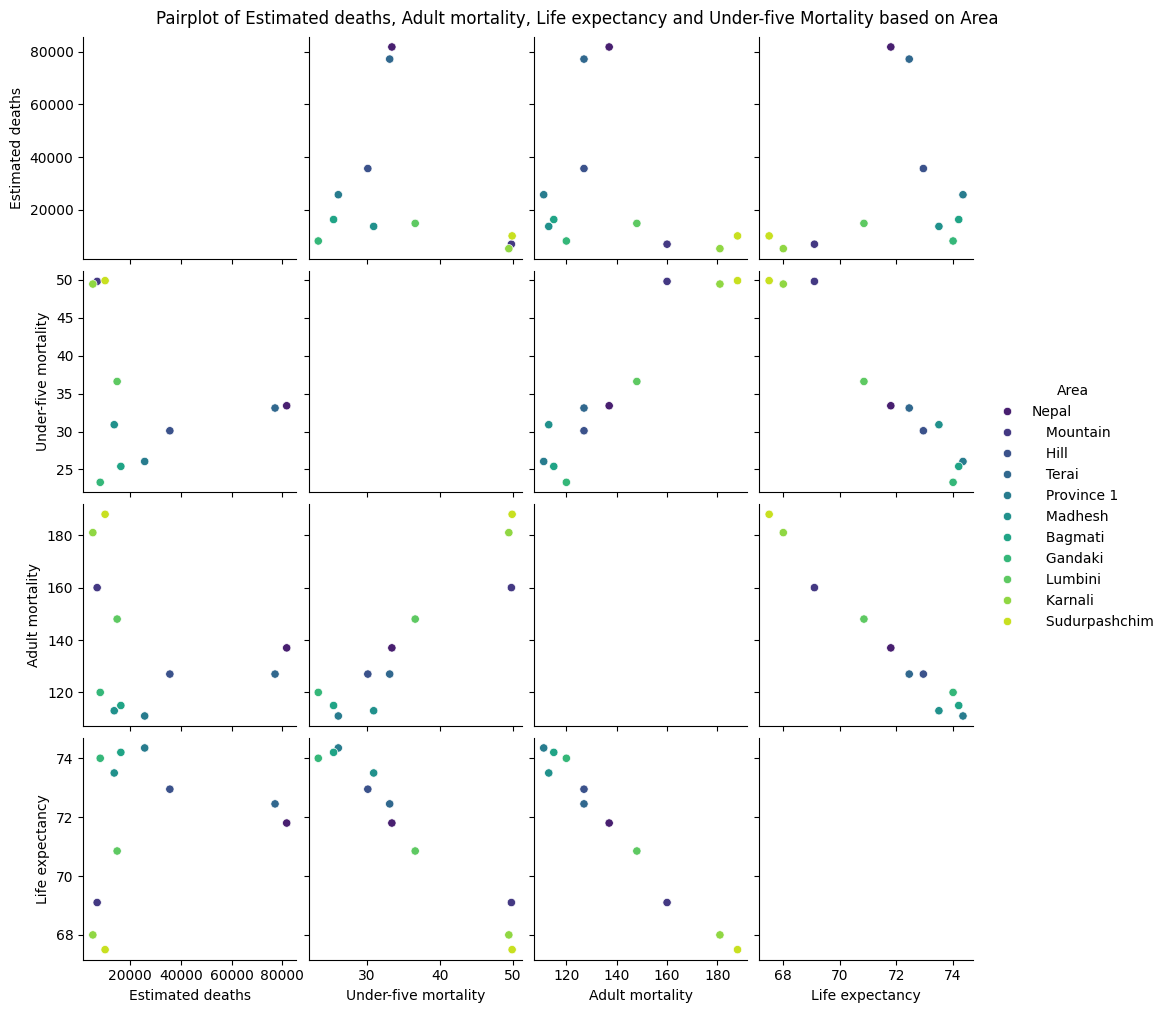

In [ ]:
import seaborn as sns

sns.pairplot(healthcare_outcomes_df[['Area', 'Estimated deaths', 'Under-five mortality', 'Adult mortality', 'Life expectancy']], hue='Area', palette='viridis')
plt.suptitle('Pairplot of Estimated deaths, Adult mortality, Life expectancy and Under-five Mortality based on Area', size=12, y=1.01)
plt.show()

**FILTER THE HEALTH OUTCOMES DATA TO DISPLAY OUTCOME DATA FOR NEPAL, KARNALI AND BAGMATI**

In [ ]:
# Select only Bagmati and Karnali rows
selected_rows = healthcare_outcomes_df.loc[[0,8,11]]

# Select only the specified columns
columns_to_select = [
    'Area',
    'Total population',
    'Estimated deaths',
    'Under-five mortality',
    'Adult mortality',
    'Life expectancy'
]

areas_of_interest = selected_rows[columns_to_select]

areas_of_interest.head()

Area  Total population  Estimated deaths  Under-five mortality  \
0      Nepal        28810563.0           81778.0                 33.40   
8    Bagmati        12252304.0           16287.0                 25.40   
11   Karnali         3455866.0            5228.0                 49.45   

    Adult mortality  Life expectancy  
0             137.0             71.8  
8             115.0             74.2  
11            181.0             68.0

**DEFINE CORRELATION BETWEEN POPULATION AND NO OF HOSPITALS IN EACH PROVINCE**

#### Use the Total population colum in healthcare dataset to calculate the correlation of No of hospitals , available in Karnali province dataset, to the number of people in the province.

In [ ]:
total_population = healthcare_outcomes_df.loc[11, 'Total population']
number_of_hospitals = len(karnali_province_df)


Hospital_Density = total_population / number_of_hospitals

print(f"Hospital Density between population and number of hospitals for karnali: {Hospital_Density:.2f}")

Hospital Density between population and number of hospitals for karnali: 7416.02


#### Use the Total population colum in healthcare dataset to calculate the correlation of No of hospitals , available in Bagmati province dataset, to the number of people in the province.

In [ ]:

total_population = healthcare_outcomes_df.loc[8, 'Total population']
number_of_hospitals = len(bagmati_province_df)

Hospital_Density = total_population / number_of_hospitals

print(f"Hospital Density between population and number of hospitals for Bagmati: {Hospital_Density:.2f}")

Hospital Density between population and number of hospitals for Bagmati: 4352.51


**Interpretation and Visualization health outcomes to visually compare the health outcomes in Bagmati verses Karnali**



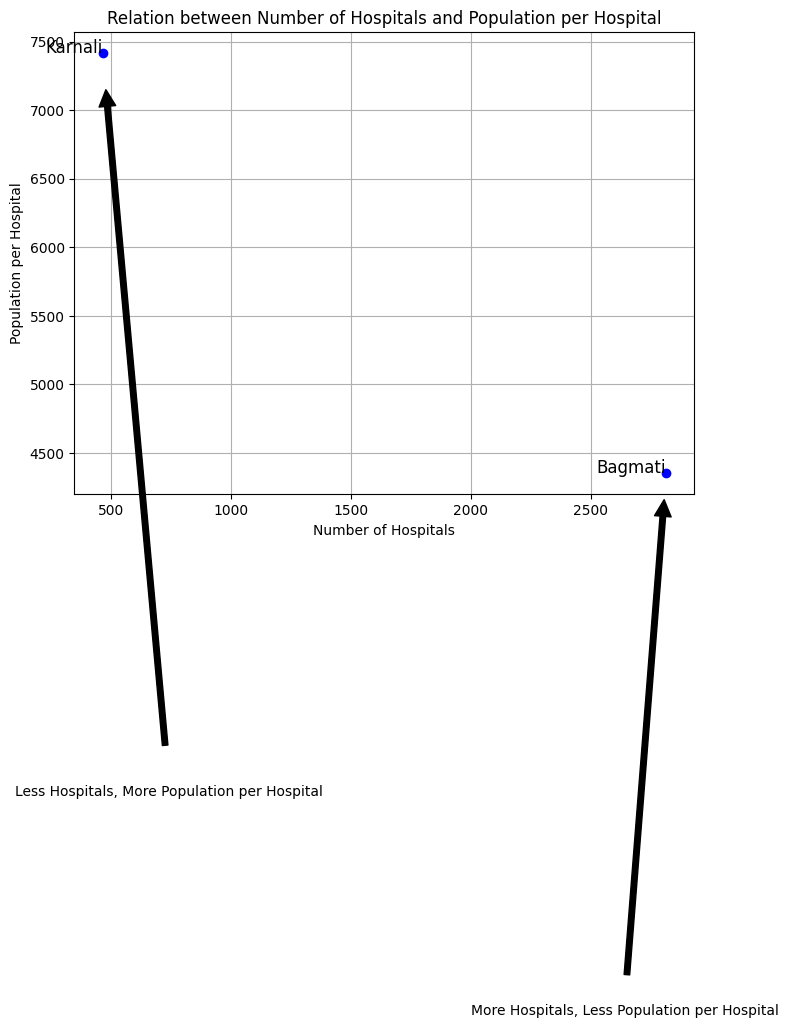

In [ ]:
# Data
provinces = ['Karnali', 'Bagmati']
num_hospitals = [466, 2815]
population = [3455866, 12252304]  # Population of Karnali and Bagmati provinces
population_per_hospital = [pop / num for pop, num in zip(population, num_hospitals)]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(num_hospitals, population_per_hospital, color='blue')
for i, province in enumerate(provinces):
    plt.text(num_hospitals[i], population_per_hospital[i], province, fontsize=12, ha='right')
plt.title('Relation between Number of Hospitals and Population per Hospital')
plt.xlabel('Number of Hospitals')
plt.ylabel('Population per Hospital')
plt.grid(True)

# Highlight the implications
plt.annotate('More Hospitals, Less Population per Hospital', xy=(num_hospitals[1], population_per_hospital[1]),
             xytext=(2000, 400), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Less Hospitals, More Population per Hospital', xy=(num_hospitals[0], population_per_hospital[0]),
             xytext=(100, 2000), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


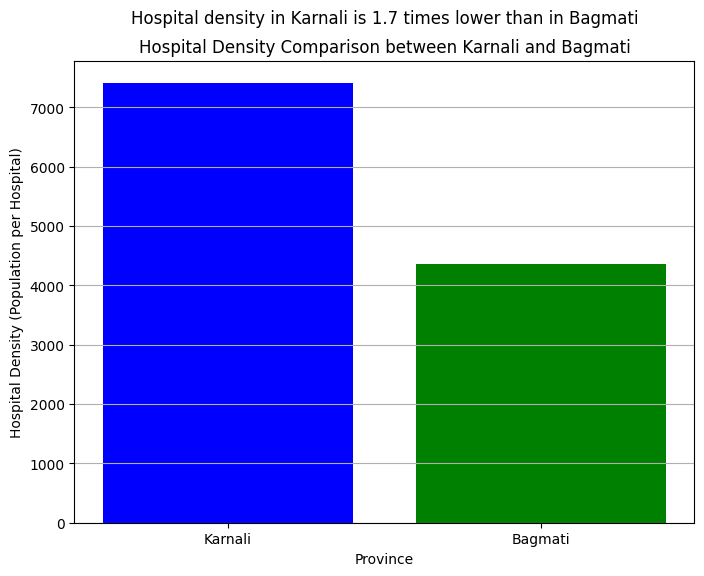

In [ ]:
import matplotlib.pyplot as plt

# Data
num_hospitals_karnali = 466
num_hospitals_bagmati = 2815
population_karnali = 3455866  # Population of Karnali province
population_bagmati = 12252304  # Population of Bagmati province

# Calculate hospital density for Karnali and Bagmati
hospital_density_karnali = population_karnali / num_hospitals_karnali
hospital_density_bagmati = population_bagmati / num_hospitals_bagmati

# Calculate the ratio of hospital density (Karnali : Bagmati)
ratio = hospital_density_karnali / hospital_density_bagmati

# Plot
plt.figure(figsize=(8, 6))
plt.bar(['Karnali', 'Bagmati'], [hospital_density_karnali, hospital_density_bagmati], color=['blue', 'green'])
plt.title('Hospital Density Comparison between Karnali and Bagmati')
plt.xlabel('Province')
plt.ylabel('Hospital Density (Population per Hospital)')
plt.grid(axis='y')

# Add text annotation for the ratio
plt.text(0.5, hospital_density_karnali + 1000, f'Hospital density in Karnali is {ratio:.1f} times lower than in Bagmati', ha='center', fontsize=12)

plt.show()


#### Visualize Estimated deaths in Karnali and Bagmati

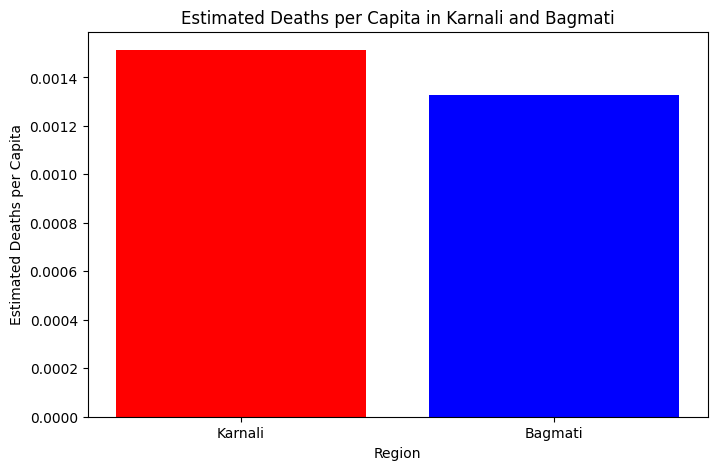

In [ ]:
regions = ['Karnali', 'Bagmati']
deaths = [5228, 16287]
population = [3455866, 12252304]

# Calculate deaths per capita
deaths_per_capita = [d / p for d, p in zip(deaths, population)]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(regions, deaths_per_capita, color=['red', 'blue', 'green'])
plt.title('Estimated Deaths per Capita in Karnali and Bagmati')
plt.xlabel('Region')
plt.ylabel('Estimated Deaths per Capita')
plt.show()


#### Visualize adult mortality vs under-five mortality for Karnali and Bagmati

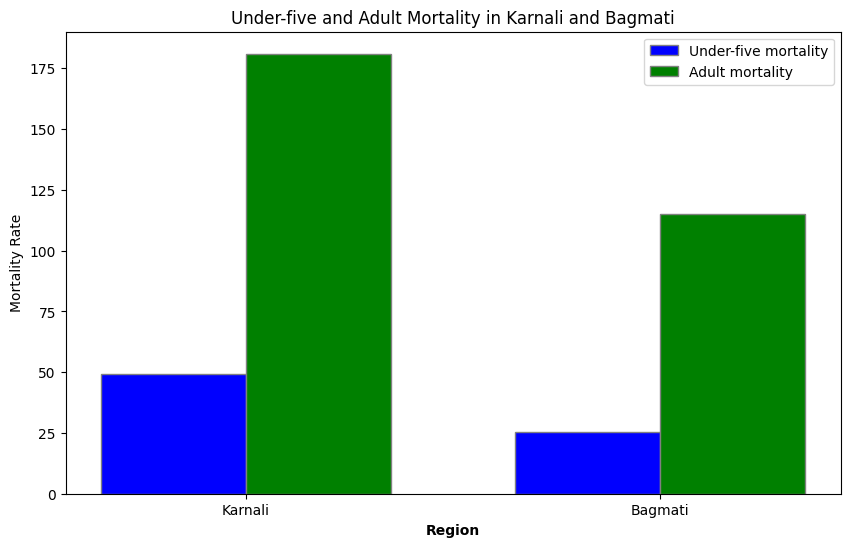

In [ ]:
regions = ['Karnali', 'Bagmati']
under_five_mortality = [49.45, 25.4]
adult_mortality = [181, 115]

# Set the positions of the bars on the x-axis
r1 = range(len(regions))
bar_width = 0.35
r2 = [x + bar_width for x in r1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(r1, under_five_mortality, color='b', width=bar_width, edgecolor='grey', label='Under-five mortality')
plt.bar(r2, adult_mortality, color='g', width=bar_width, edgecolor='grey', label='Adult mortality')
plt.xlabel('Region', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(regions))], regions)
plt.ylabel('Mortality Rate')
plt.title('Under-five and Adult Mortality in Karnali and Bagmati')
plt.legend()

plt.show()


#### Visualization of the comparison between Under-five Mortality, Adult Mortality and Life expectancy in Karnali and Bagmati

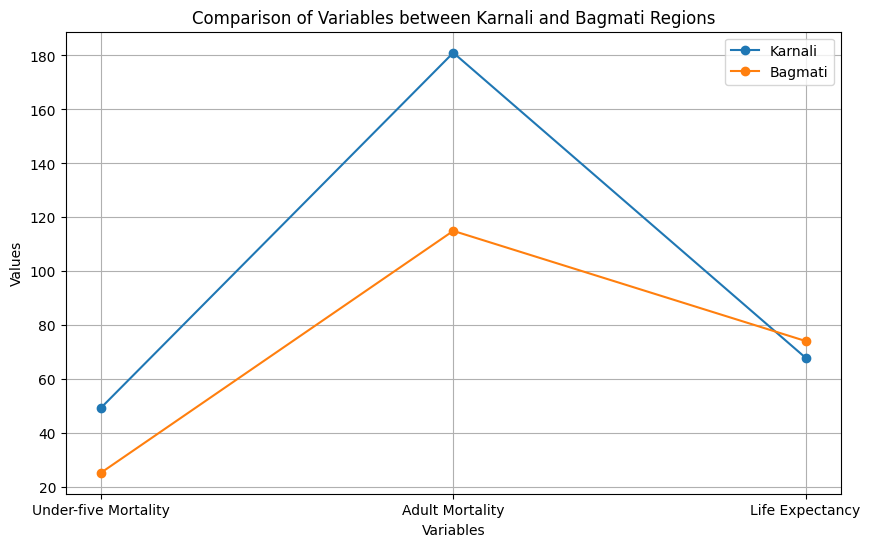

In [ ]:
regions = ['Karnali', 'Bagmati']
variables = ['Under-five Mortality', 'Adult Mortality', 'Life Expectancy']
karnali_data = [49.45, 181, 68.0]
bagmati_data = [25.4, 115, 74.2]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(variables, karnali_data, marker='o', label='Karnali')
plt.plot(variables, bagmati_data, marker='o', label='Bagmati')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Comparison of Variables between Karnali and Bagmati Regions')
plt.legend()
plt.grid(True)
plt.show()


#### Visualize the Total Population and Estimated deaths distribution for Nepal, Karnali and Bagmati

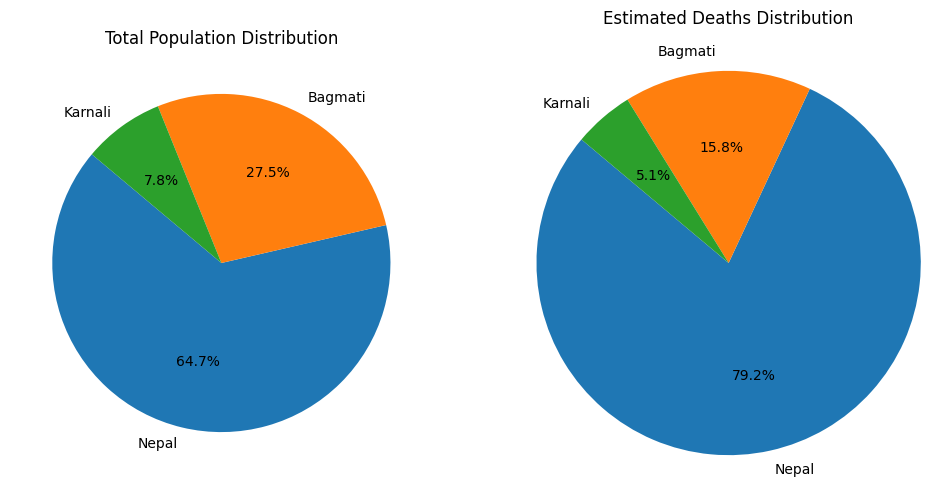

In [ ]:
provinces = ['Nepal', 'Bagmati', 'Karnali']
total_population = [28810563, 12252304, 3455866]
estimated_deaths = [81778, 16287, 5228]

# Pie chart for Total Population
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(total_population, labels=provinces, autopct='%1.1f%%', startangle=140)
plt.title('Total Population Distribution')

# Pie chart for Estimated Deaths
plt.subplot(1, 2, 2)
plt.pie(estimated_deaths, labels=provinces, autopct='%1.1f%%', startangle=140)
plt.title('Estimated Deaths Distribution')

plt.axis('equal')
plt.show()